In [1]:
import numpy as np
import pandas as pd     #dataframes are more structured table so we use pandas dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
#Data collection and analysis
#loading the data from csv file to a pandas dataframe
insurance_dataset=pd.read_csv('insurance.csv')

In [3]:
insurance_dataset.head()   #printing first five rows of dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Finding number of rows and columns 
insurance_dataset.shape
#This is somewhat a midrange dataset 

(1338, 7)

In [5]:
#getting some information about the dataset
insurance_dataset.info()
#We also observe that no data is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Categorical features
#Sex
#Smoker
#Region
#Charges is the target variable remaining data are features
insurance_dataset.isnull().sum() #checking if there are any missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\SAGNIK CHANDA\AppData\Local\Temp\ipykernel_22532\93785868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


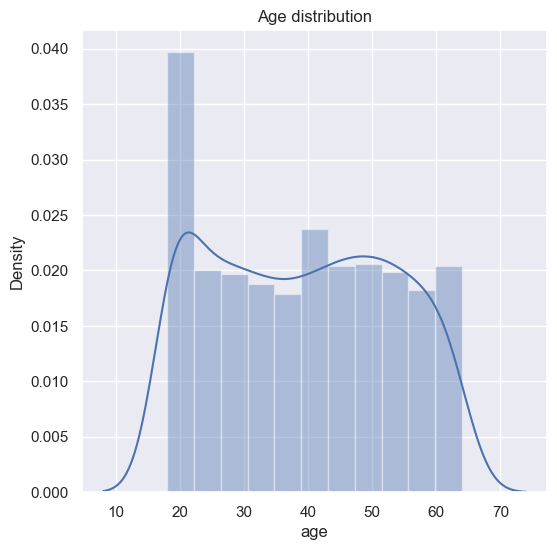

In [8]:
#Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

#Distribution is more in the age range 20-23

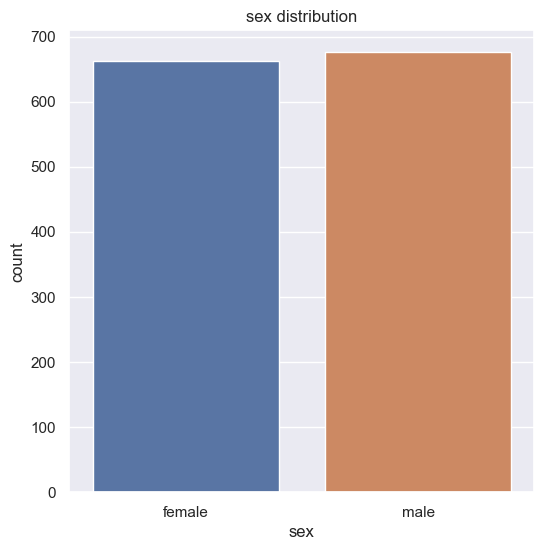

In [9]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset) #This countplot gives number of values for males and females
plt.title('sex distribution')
plt.show()

#Distribution is almost equal.


In [10]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\SAGNIK CHANDA\AppData\Local\Temp\ipykernel_22532\1419939937.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


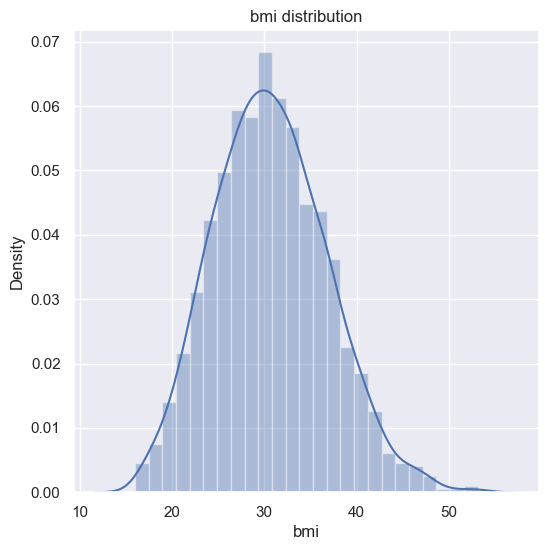

In [11]:
#BMI is not categorical so we copy the code for age distribution and make the requisite changes
#Distribution of BMI value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()
#The graph we obtain resembles a normal distribution plot. 
#One important thing to note here is that a lot of persons bmi is more than 25 indicating overweight persons. 
#This might increase the insurance cost which is helpful for our analysis

In [12]:
#Normal bmi range for a person is 18.5 to 24.9

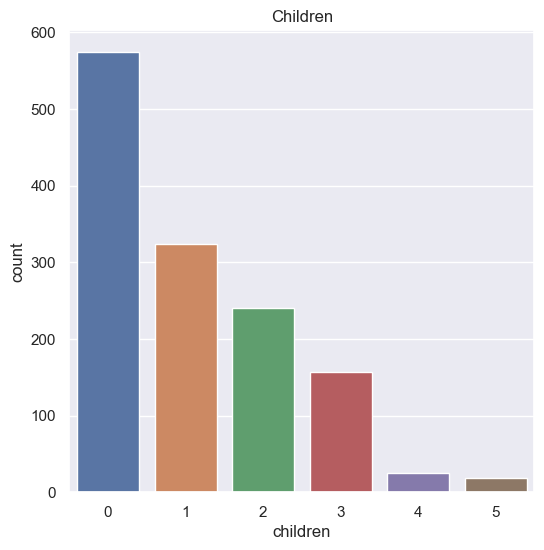

In [13]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

#We observe that number of persons which no children is around 570 while those with one children is ariund 330 and so on

In [14]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

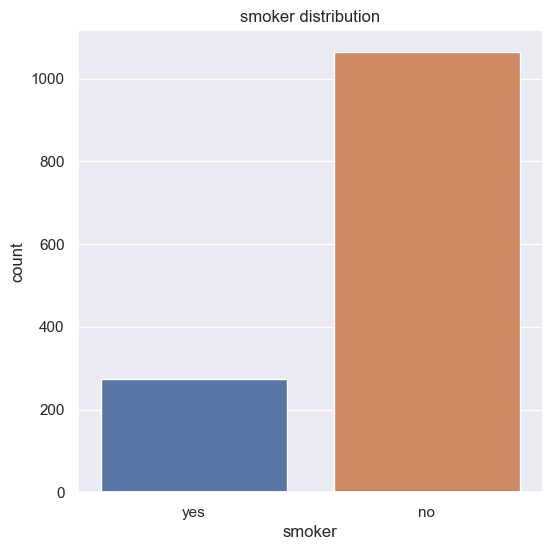

In [15]:
#Soker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset) #This countplot gives number of values for smokers and non smokers
plt.title('smoker distribution')
plt.show()

#This data has more non smokers than smokers

In [16]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

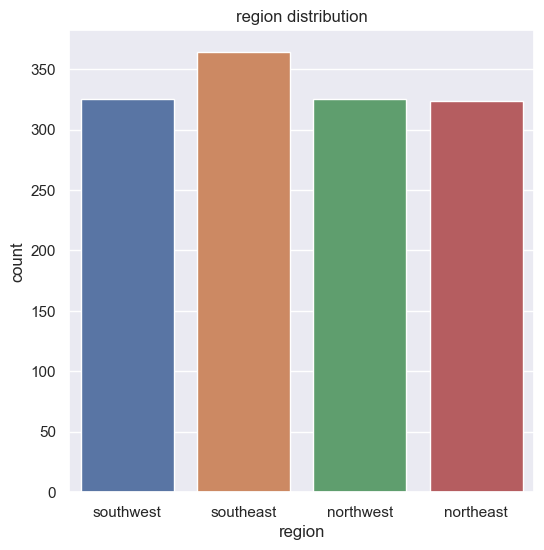

In [17]:
#Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset) #This countplot gives number of values for different regions
plt.title('region distribution')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\SAGNIK CHANDA\AppData\Local\Temp\ipykernel_22532\1104746261.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


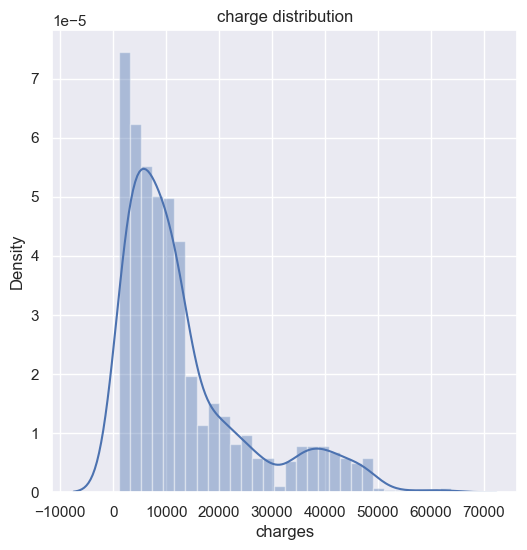

In [19]:
#Distribution of charges
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charge distribution')
plt.show()

#Most of the values are near the 10,000 dollars

In [20]:
#Data pre processing
#We have 3 categorical columns. computers dont understand text values so we can feed the data to our model
#This process is known as encoding the categorical features

In [21]:
#Encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

In [22]:
#Encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [23]:
#Encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [24]:
insurance_dataset.head() #All values transformed to numerical values

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [25]:
#Splitting the features and targets
x=insurance_dataset.drop(columns='charges',axis=1)  #note that 1 represents columns and 0 represents rows
y=insurance_dataset['charges']
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [26]:
print(x)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [27]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [28]:
#Splitting data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
#x splits into two sets x train and x test and the corresponding tables for the training data and the testing data go to y train and y test resoectively
#the split happens according to the random state

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [30]:
#Model training
#We use the linear regression model. The features are taken in the x axis while the target is taken in the y axis.
#The equation of the linear regression line is y=mx+c
#here, x=input features, y=prediction features, m=slope, c=intercept
#This model basically tries to fit the data in a linear model and based on this line fitting it can predict new values.

In [31]:
#Loading the linear regression model
regressor=LinearRegression()

In [32]:
regressor.fit(x_train,y_train)

LinearRegression()

In [33]:
#Evaluate the  model
#prediction on traning data
training_data_prediction=regressor.predict(x_train)
#The predicted values are stored in the training data prediction

In [34]:
#R-square value
r2_train=metrics.r2_score(y_train,training_data_prediction)
#here we are comparing the original \values and the prediced av,lues of y_train
print('R squared value is:',r2_train)

R squared value is: 0.751505643411174


In [35]:
test_data_prediction=regressor.predict(x_test)
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value is:',r2_test)

R squared value is: 0.7447273869684077


In [36]:
#Sometimes we get a huge value for the training data and a small value for the testing data. This happens when model is overfitted
#To test this we use r2 for trainng as well as testing data
#For a good performance the training data and testing data should be nearly equal to each other.
#This model shows a good performance so we dont have the overfitting issue in this case

In [37]:
#Building a predictive system 
input_data= (31,1,25.74,0,1,0) #This is a tuple datatype.Here i have taken the datapoint from our model to see how good the model predicts our value
#changing input data from a tuple to numpy array
input_data_as_numpy_array=np.array(input_data)
#Reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#We are jsut giving one row data point here. Since the model will be expecting same umber of values we are mentioning(1,-1)

prediction=regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])



[3760.0805765]
The insurance cost is USD 3760.0805764960587


c:\Users\SAGNIK CHANDA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
